## Airlines Passengers data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")  

<AxesSubplot:>

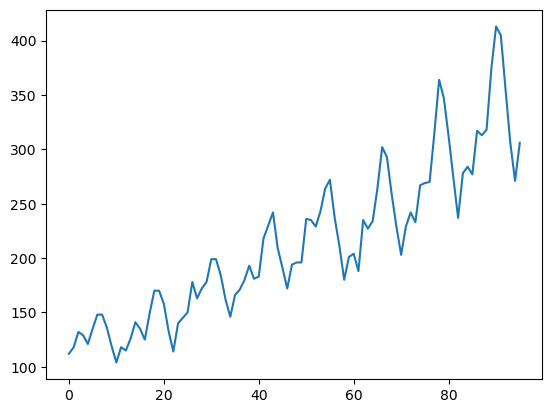

In [2]:
data = pd.read_excel("Airlines+Data.xlsx")
data.Passengers.plot() 

## Splitting data

In [3]:
Train = data.head(147)
Test = data.tail(12) 

## Moving Average

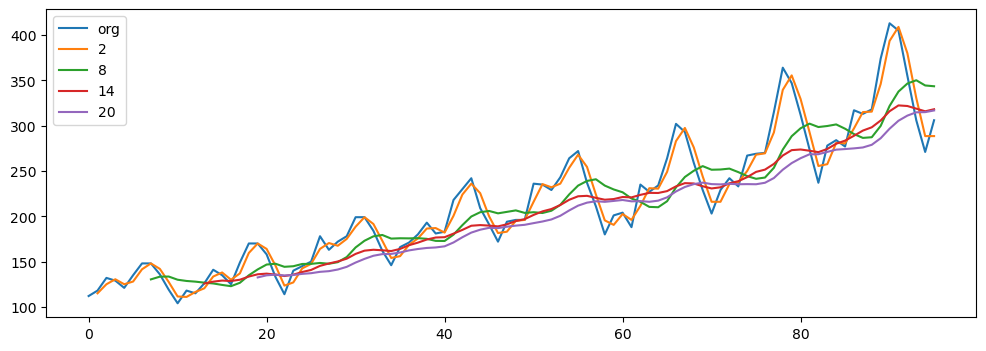

In [4]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

## Time series decomposition plot

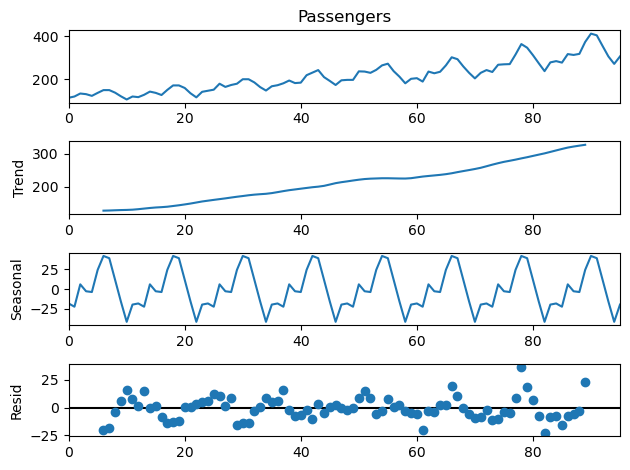

In [5]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show() 

## ACF plots and PACF plots

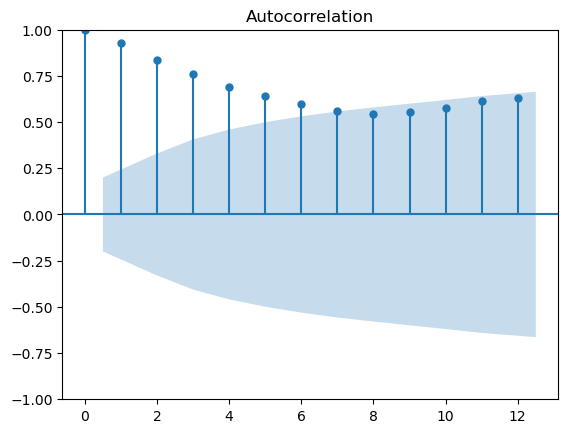

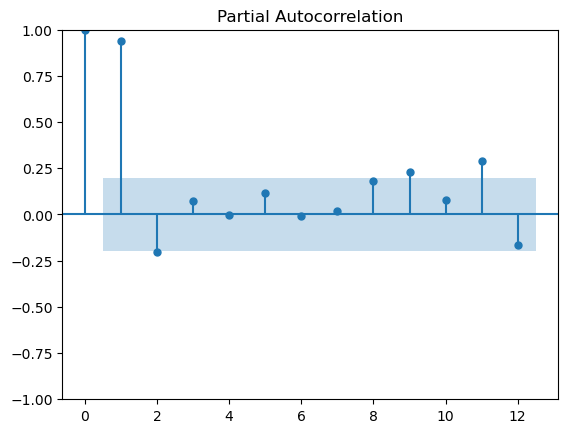

In [6]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show() 

## Evaluation Metric MAPE

In [7]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

## Simple Exponential Method

In [8]:
Train["Passengers"] = Train["Passengers"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)   

11.652581888339823

## Holt method

In [9]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)  

9.843474829332122

## Holts winter exponential smoothing with additive seasonality and additive trend

In [10]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

2.038559193457238

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [11]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

1.1862347747030937

## Final Model by combining train and test

In [12]:
data["Passengers"] = data["Passengers"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [13]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)    

96     312.900533
97     308.172851
98     355.534843
99     345.772161
100    345.698761
101    392.473944
102    436.505077
103    429.863114
104    380.176787
105    332.321235
dtype: float64